In [1]:
#Importing libraries
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt

### Carbon Dataset

In [2]:
#carbon= pd.read_csv("/Users/shreyanskothari/Desktop/Quant theory : methodology/Data/Carbon Emissions/state_co2_emissions_from_fossil_fuel_combustion_1990-2018.csv", sep = ',', skiprows=2)

In [37]:
carbon= pd.read_csv("/Users/shreyanskothari/Desktop/Quant theory : methodology/Data/Carbon Emissions/residential_emissions.csv", sep = ',', skiprows=2)


In [39]:
carbon.head()

,State,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,Percent,Absolute,Unnamed: 42
0,Alabama,3.6,3.4,3.4,3.5,3.3,2.9,3.0,3.4,3.4,...,1.8,2.2,2.4,2.1,1.9,1.7,2.3,-36.1%,-1.3,NaN
1,Alaska,0.9,0.9,1.2,1.2,1.4,1.4,1.3,1.3,1.2,...,1.8,1.6,1.5,1.6,1.5,1.7,1.5,66.7%,0.6,NaN
2,Arizona,1.8,1.6,1.8,1.8,1.7,1.8,1.6,1.8,1.7,...,2.1,2.4,2.0,2.1,2.2,2.1,2.2,22.2%,0.4,NaN
3,Arkansas,3.0,2.7,2.8,3.1,2.9,2.7,2.6,2.6,2.7,...,1.6,2.2,2.4,2.0,1.7,1.6,2.1,-30.0%,-0.9,NaN
4,California,30.4,28.0,30.8,28.7,27.0,30.3,26.6,28.6,28.5,...,27.3,27.7,22.9,23.4,24.1,25.1,24.8,-18.4%,-5.6,NaN


In [40]:
#Cleaning carbon dataset
#carbon = carbon[carbon.Sector == 'Residential']
carbon = carbon.drop(columns= ['Percent', 'Absolute', 'Unnamed: 42'])

In [41]:
carbon.head()

,State,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,3.6,3.4,3.4,3.5,3.3,2.9,3.0,3.4,3.4,...,2.5,2.9,2.3,1.8,2.2,2.4,2.1,1.9,1.7,2.3
1,Alaska,0.9,0.9,1.2,1.2,1.4,1.4,1.3,1.3,1.2,...,1.7,1.7,1.7,1.8,1.6,1.5,1.6,1.5,1.7,1.5
2,Arizona,1.8,1.6,1.8,1.8,1.7,1.8,1.6,1.8,1.7,...,2.2,2.3,2.4,2.1,2.4,2.0,2.1,2.2,2.1,2.2
3,Arkansas,3.0,2.7,2.8,3.1,2.9,2.7,2.6,2.6,2.7,...,2.2,2.3,2.1,1.6,2.2,2.4,2.0,1.7,1.6,2.1
4,California,30.4,28.0,30.8,28.7,27.0,30.3,26.6,28.6,28.5,...,28.3,28.9,29.7,27.3,27.7,22.9,23.4,24.1,25.1,24.8


In [42]:
carbon.columns

Index(['State', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018'],
      dtype='object')

In [43]:
carbon = pd.melt(carbon, id_vars = 'State', value_vars=['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018'], value_name='emissions', var_name = 'year')

In [375]:
carbon = carbon.rename(columns={'State':'state'})
carbon.head()

,state,year,emissions
0,Alabama,1980,3.6
1,Alaska,1980,0.9
2,Arizona,1980,1.8
3,Arkansas,1980,3.0
4,California,1980,30.4


In [45]:
carbon.shape

(1989, 3)

### Inequality Dataset

In [46]:
inequality = pd.read_csv("/Users/shreyanskothari/Desktop/Quant theory : methodology/Data/Income Inequality/Frank_Gini_2018.csv",
                        sep = ',')

In [47]:
inequality.head()

,Year,st,State,Atkin05,Gini,RMeanDev,Theil
0,1917,0,United States,0.255703,0.507681,0.792800,0.844601
1,1917,1,Alabama,0.156439,0.399792,0.608259,0.446908
2,1917,3,Arizona,0.159122,0.399658,0.617671,0.450125
3,1917,4,Arkansas,0.127598,0.376483,0.561483,0.324998
4,1917,5,California,0.192735,0.449363,0.687849,0.553006


In [48]:
#Dropping 'st', Atkin05','RMeanDev', and 'Gini'
inequality = inequality.drop(columns= ['st','Atkin05','Gini','RMeanDev'])
inequality.head()

,Year,State,Theil
0,1917,United States,0.844601
1,1917,Alabama,0.446908
2,1917,Arizona,0.450125
3,1917,Arkansas,0.324998
4,1917,California,0.553006


In [49]:
#Dropping Years before 1980:
inequality = inequality[inequality.Year >=1980]
inequality.head()

,Year,State,Theil
3192,1980,United States,0.425711
3193,1980,Alabama,0.397920
3194,1980,Alaska,0.411709
3195,1980,Arizona,0.394529
3196,1980,Arkansas,0.392170


In [50]:
inequality = inequality.rename(columns = {'Year':'year', 'State':'state', 'Theil':'theil'})

In [51]:
inequality = inequality[inequality.state != 'United States']

In [91]:
inequality.shape

(1989, 3)

### Minimum Wage Dataset

In [81]:
min_wage = pd.read_csv("/Users/shreyanskothari/Desktop/Quant theory : methodology/Data/Income Inequality/minwage_1980.csv", sep = ',')

In [82]:
min_wage.head()

,DATE,Alaska,Arkansas,Arizona,California,Colorado,Connecticut,District of Columbia,Delaware,Federal Minimum Wage Rate under the Federal Fair Labor Standards Act,...,Vermont,Washington,Wisconsin,West Virginia,Wyoming,Alabama,Louisiana,Mississippi,South Carolina,Tennessee
0,1980.0,3.60,2.55,3.10,2.90,1.9,3.12,3.50,2.0,3.10,...,3.10,2.3,3.00,2.20,1.6,3.10,3.10,3.10,3.10,3.10
1,1981.0,3.85,2.70,3.35,3.35,1.9,3.37,3.75,2.0,3.35,...,3.35,2.3,3.25,2.75,1.6,3.35,3.35,3.35,3.35,3.35
2,1982.0,3.85,2.70,3.35,3.35,1.9,3.37,3.75,2.0,3.35,...,3.35,2.3,3.25,2.75,1.6,3.35,3.35,3.35,3.35,3.35
3,1983.0,3.85,2.70,3.35,3.35,1.9,3.37,3.75,2.0,3.35,...,3.35,2.3,3.25,2.75,1.6,3.35,3.35,3.35,3.35,3.35
4,1984.0,3.85,2.70,3.35,3.35,1.9,3.37,3.75,2.0,3.35,...,3.35,2.3,3.25,2.75,1.6,3.35,3.35,3.35,3.35,3.35


In [83]:
min_wage.columns

Index(['DATE', 'Alaska', 'Arkansas', 'Arizona', 'California', 'Colorado',
       'Connecticut', 'District of Columbia', 'Delaware',
       'Federal Minimum Wage Rate under the Federal Fair Labor Standards Act',
       'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana',
       'Kansas', 'Kentucky', 'Massachusettes', 'Maryland', 'Maine', 'Michigan',
       'Minnesota', 'Missouri', 'Montana', 'North Carolina', 'North Dakota',
       'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada',
       'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'South Dakota', 'Texas', 'Utah', 'Virginia',
       'Virgin Islands', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia',
       'Wyoming', 'Alabama', 'Louisiana', 'Mississippi', 'South Carolina',
       'Tennessee'],
      dtype='object')

In [84]:
min_wage = min_wage.drop(columns = ['Federal Minimum Wage Rate under the Federal Fair Labor Standards Act', 'Puerto Rico', 'Virgin Islands'])

In [85]:
min_wage = pd.melt(min_wage, id_vars=['DATE'], value_vars = ['Alaska','Arkansas', 'Arizona', 'California', 'Colorado',
       'Connecticut', 'District of Columbia', 'Delaware',
       'Florida', 'Georgia', 'Hawaii','Iowa', 'Idaho', 'Illinois', 'Indiana',
       'Kansas', 'Kentucky', 'Massachusettes', 'Maryland', 'Maine', 'Michigan',
       'Minnesota', 'Missouri', 'Montana', 'North Carolina', 'North Dakota',
       'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada',
       'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Dakota', 'Texas', 'Utah', 'Virginia',
       'Vermont', 'Washington', 'Wisconsin', 'West Virginia',
       'Wyoming', 'Alabama', 'Louisiana', 'Mississippi', 'South Carolina',
       'Tennessee'], var_name='state', value_name = 'min_wage')
min_wage = min_wage.dropna()

In [86]:
min_wage['DATE'] = min_wage.DATE.apply(int)
min_wage.head()

,DATE,state,min_wage
0,1980,Alaska,3.60
1,1981,Alaska,3.85
2,1982,Alaska,3.85
3,1983,Alaska,3.85
4,1984,Alaska,3.85


In [87]:
min_wage = min_wage.rename(columns = {'DATE':'year'})
min_wage.head()

,year,state,min_wage
0,1980,Alaska,3.60
1,1981,Alaska,3.85
2,1982,Alaska,3.85
3,1983,Alaska,3.85
4,1984,Alaska,3.85


In [89]:
min_wage = min_wage[min_wage.year <= 2018]

In [90]:
min_wage.shape

(1989, 3)

___

In [151]:
c1 = carbon.sort_values(['state', 'year'])
c1 = c1.reset_index()
c1 = c1.drop(columns='index')
c1.head()

,state,year,emissions
0,Alabama,1980,3.6
1,Alabama,1981,3.4
2,Alabama,1982,3.4
3,Alabama,1983,3.5
4,Alabama,1984,3.3


In [152]:
in1 = inequality.sort_values(['state', 'year'])

in1 = in1.reset_index()
in1 = in1.drop(columns='index')

in1.head()

,year,state,theil
0,1980,Alabama,0.397920
1,1981,Alabama,0.383564
2,1982,Alabama,0.361735
3,1983,Alabama,0.357333
4,1984,Alabama,0.367350


In [153]:
min1 = min_wage.sort_values(['state', 'year'])
min1 = min1.reset_index()
min1= min1.drop(columns='index')
min1.head()

,year,state,min_wage
0,1980,Alabama,3.10
1,1981,Alabama,3.35
2,1982,Alabama,3.35
3,1983,Alabama,3.35
4,1984,Alabama,3.35


In [163]:
df = pd.DataFrame({'year':c1.year,'state':c1.state, 'emissions':c1.emissions,'min_wage':min1.min_wage, 'theil':in1.theil})

In [412]:
summary_stats = df.groupby(['year']).mean()
summary_stats
abc = df.groupby(['year', 'state']).mean().head(51)

In [413]:
pip install dataframe-image

Note: you may need to restart the kernel to use updated packages.


In [420]:
import dataframe_image as dfi
dfi.export(df1.groupby(['year', 'state']).mean().head(50), '1980_state_mean.png')
dfi.export(df1.groupby(['year', 'state']).mean().tail(50), '2018_state_mean.png')


In [590]:
inequality[inequality['year']==2018]

,year,state,theil
5169,2018,Alabama,0.772632
5170,2018,Alaska,0.627504
5171,2018,Arizona,0.863477
5172,2018,Arkansas,1.065792
5173,2018,California,1.186206
5174,2018,Colorado,0.930888
5175,2018,Connecticut,1.313262
5176,2018,Delaware,0.738565
5177,2018,District of Columbia,1.115915
5178,2018,Florida,1.368683


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

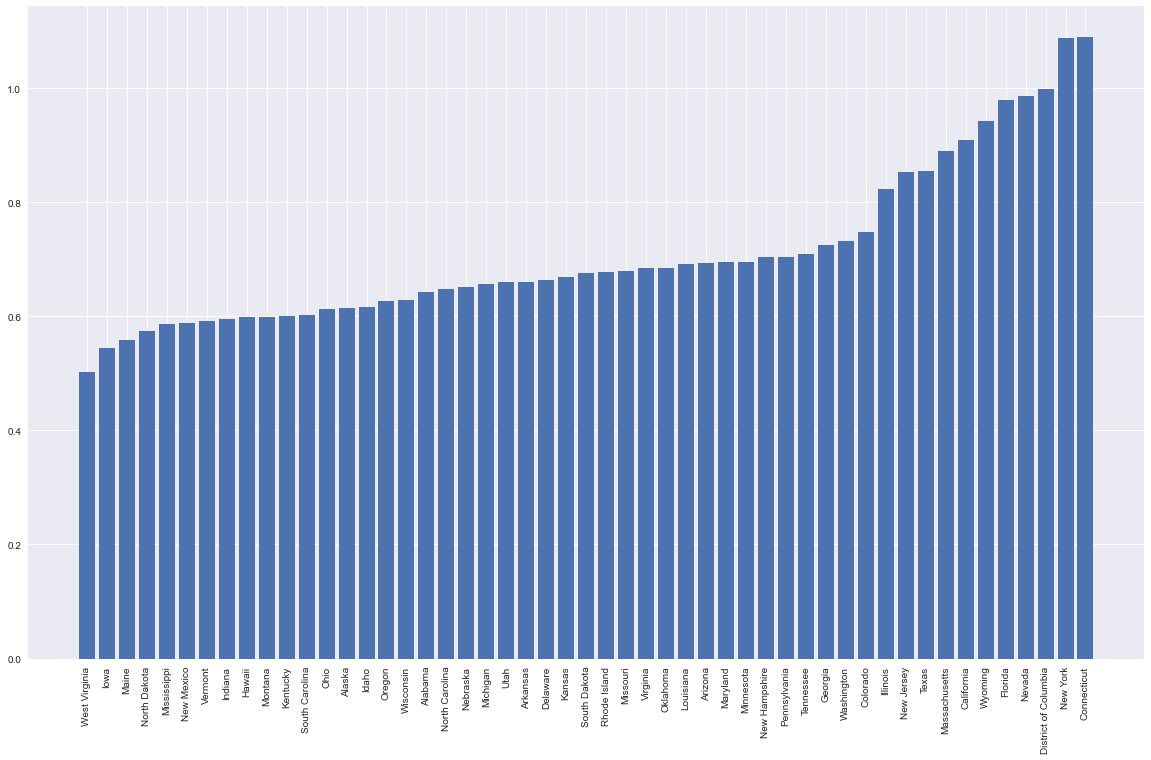

In [583]:
plt.bar(inequality.groupby('state').mean().sort_values('theil').index,inequality.groupby('state').mean().sort_values('theil')['theil'])
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Income Inequality Measure: Theil Index (1980 vs 2018)')

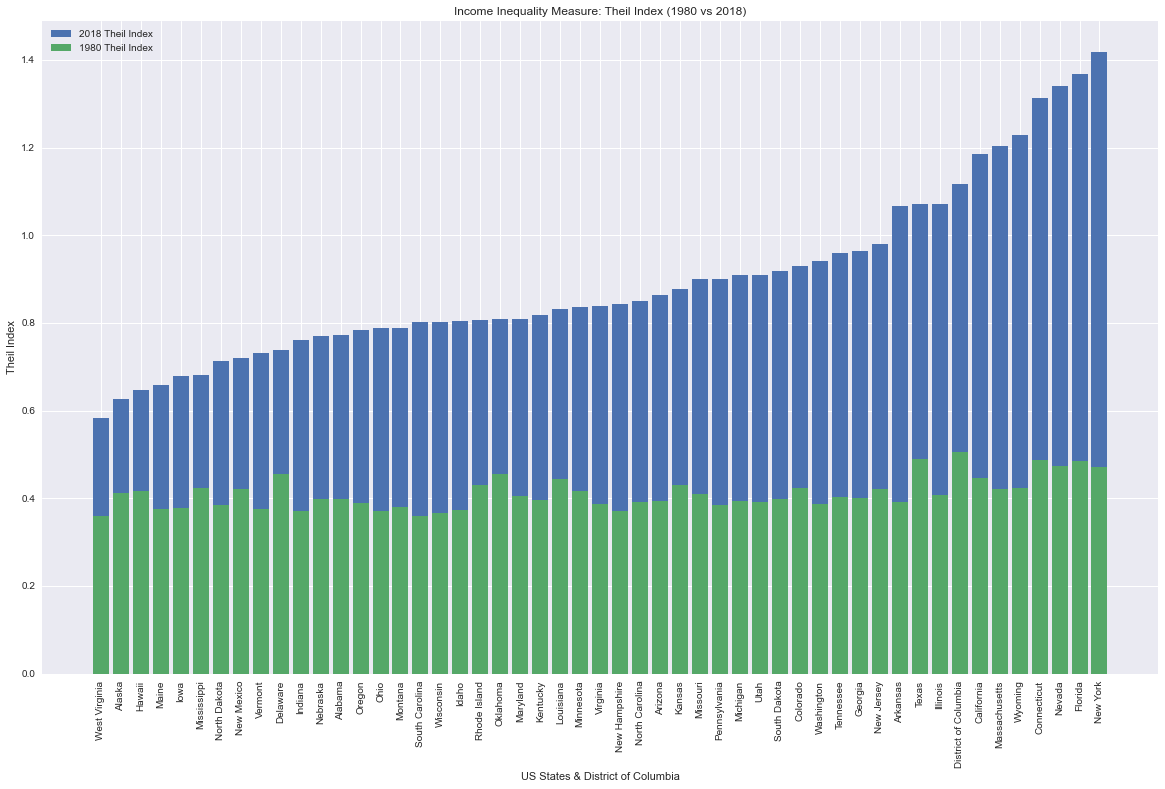

In [597]:
plt.bar(inequality[inequality['year']==2018].sort_values('theil').state,inequality[inequality['year']==2018].sort_values('theil').theil, label = '2018 Theil Index')
plt.bar(inequality[inequality['year']==1980].sort_values('theil').state,inequality[inequality['year']==1980].sort_values('theil').theil, label = '1980 Theil Index')
plt.legend(loc="upper left")

plt.xticks(rotation=90)
plt.xlabel('US States & District of Columbia')
plt.ylabel('Theil Index')
plt.title('Income Inequality Measure: Theil Index (1980 vs 2018)')

In [431]:
def save_table_year(x, name):
    import dataframe_image as dfi
    tmp = df1.groupby(['year']).describe()[x]
    dfi.export(tmp, name)
    


In [436]:
save_table_year('theil', 'inequality_stats.png')

In [450]:
df1.describe()[['emissions', 'min_wage', 'adj_wage', 'theil']]

,emissions,min_wage,adj_wage,theil
count,1989.000000,1989.000000,1989.000000,1989.000000
mean,6.879336,5.073962,2.938089,0.708330
std,8.019149,2.010401,0.548270,0.226273
min,0.000000,1.250000,0.899831,0.291326
25%,1.800000,3.350000,2.697897,0.574881
50%,3.400000,5.150000,2.960075,0.687277
75%,8.000000,7.100000,3.257944,0.815147
max,40.000000,13.250000,5.255529,1.498469


In [445]:
dfi.export(df1.describe()[['emissions', 'min_wage', 'adj_wage', 'theil']],'sum_stats.png')

___

In [266]:
region = pd.read_csv("/Users/shreyanskothari/Desktop/Quant theory : methodology/Data/Income Inequality/region.csv", sep=',')

In [305]:
region.head()

,state,region
0,Alabama,SO
1,Alaska,WE
2,Arizona,WE
3,Arkansas,SO
4,California,WE


In [275]:
df1 = pd.merge(df, region, on = 'state', how = 'inner')

In [289]:
cpi = pd.read_csv("/Users/shreyanskothari/Desktop/Quant theory : methodology/Data/Income Inequality/CPI.csv", sep = ',')

In [365]:
cpi

,year,CPI
0,1980,82.400
1,1981,90.900
2,1982,96.500
3,1983,99.600
4,1984,103.900
5,1985,107.600
6,1986,109.600
7,1987,113.600
8,1988,118.300
9,1989,124.000


In [309]:
df1['year'] = df1.year.apply(int)
cpi['year'] = cpi.year.apply(int)
df1 = pd.merge(df1, cpi, on = 'year', how = 'left')
df1.head()

In [ ]:
#Adding Inflation Adjusted Wage
df1['adj_wage'] = (99.600 / df1['CPI'])*df1['min_wage'] #1983
df1.head()

In [559]:
df1.head(10)

,year,state,emissions,min_wage,theil,region,CPI,adj_wage
0,1980,Alabama,3.6,3.10,0.397920,SO,82.4,3.747087
1,1981,Alabama,3.4,3.35,0.383564,SO,90.9,3.670627
2,1982,Alabama,3.4,3.35,0.361735,SO,96.5,3.457617
3,1983,Alabama,3.5,3.35,0.357333,SO,99.6,3.350000
4,1984,Alabama,3.3,3.35,0.367350,SO,103.9,3.211357
5,1985,Alabama,2.9,3.35,0.392942,SO,107.6,3.100929
6,1986,Alabama,3.0,3.35,0.412333,SO,109.6,3.044343
7,1987,Alabama,3.4,3.35,0.462122,SO,113.6,2.937148
8,1988,Alabama,3.4,3.35,0.528768,SO,118.3,2.820456
9,1989,Alabama,3.3,3.35,0.630718,SO,124.0,2.690806


___

### Exploratory Analysis

In [397]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
plt.style.use('seaborn')


In [369]:
sum_stat = df1.groupby(['year']).mean()
sum_stat.columns

Index(['emissions', 'min_wage', 'theil', 'CPI', 'adj_wage'], dtype='object')

Text(0, 0.5, 'Unadjusted US Minimum Wage')

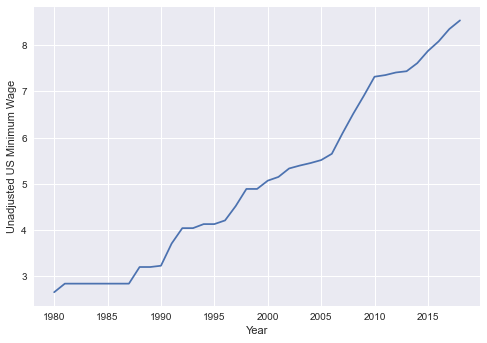

In [405]:

plt.plot(sum_stat.index, sum_stat.min_wage)
plt.xlabel("Year")
plt.ylabel("Unadjusted US Minimum Wage")

Text(0.5, 1.0, 'US Minimum Wage Over the Years')

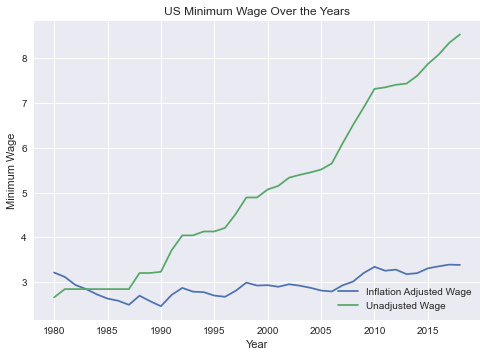

In [401]:
plt.plot(sum_stat.index, sum_stat.adj_wage, label="Inflation Adjusted Wage")
plt.plot(sum_stat.index, sum_stat.min_wage, label="Unadjusted Wage")
plt.legend(loc="lower right")

plt.xlabel("Year")
plt.ylabel("Minimum Wage")
plt.title("US Minimum Wage Over the Years")

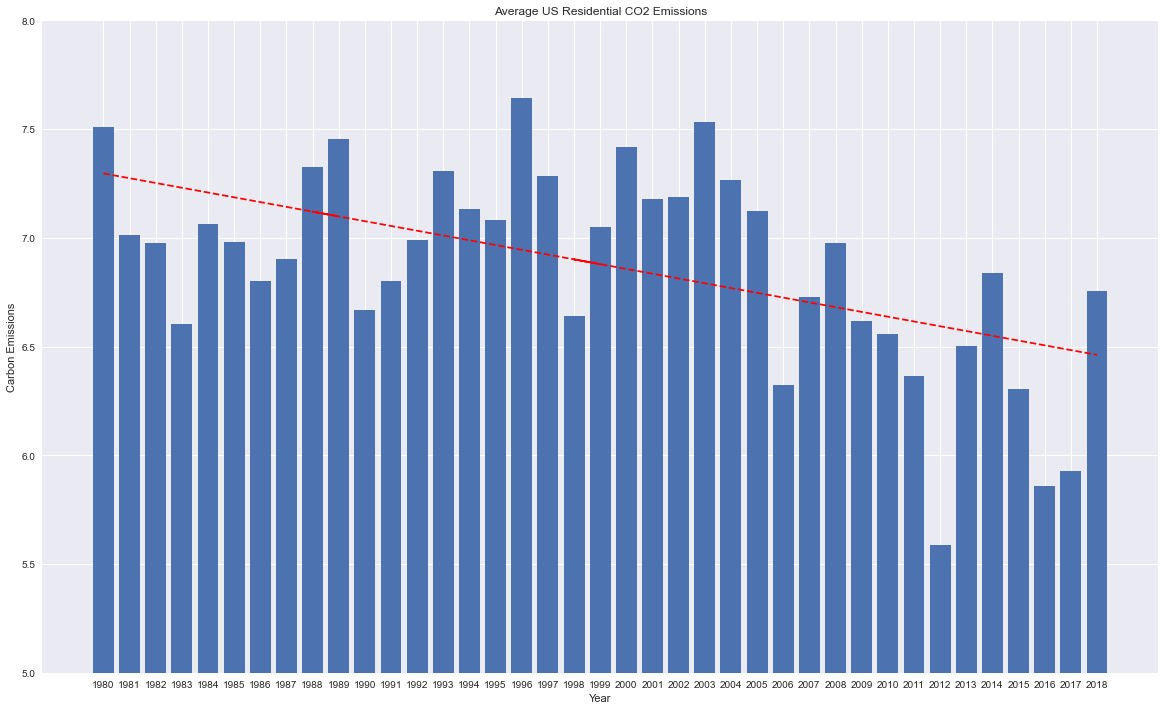

In [608]:
plt.bar(sum_stat.index, sum_stat.emissions)
plt.xlabel("Year")
plt.ylabel("Carbon Emissions")
plt.title("Average US Residential CO2 Emissions")
plt.xticks(range(1980,2019))
plt.ylim(5, 8)
x = sum_stat.index
y = sum_stat.emissions
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

Text(0.5, 0, 'US States & the District of Columbia')

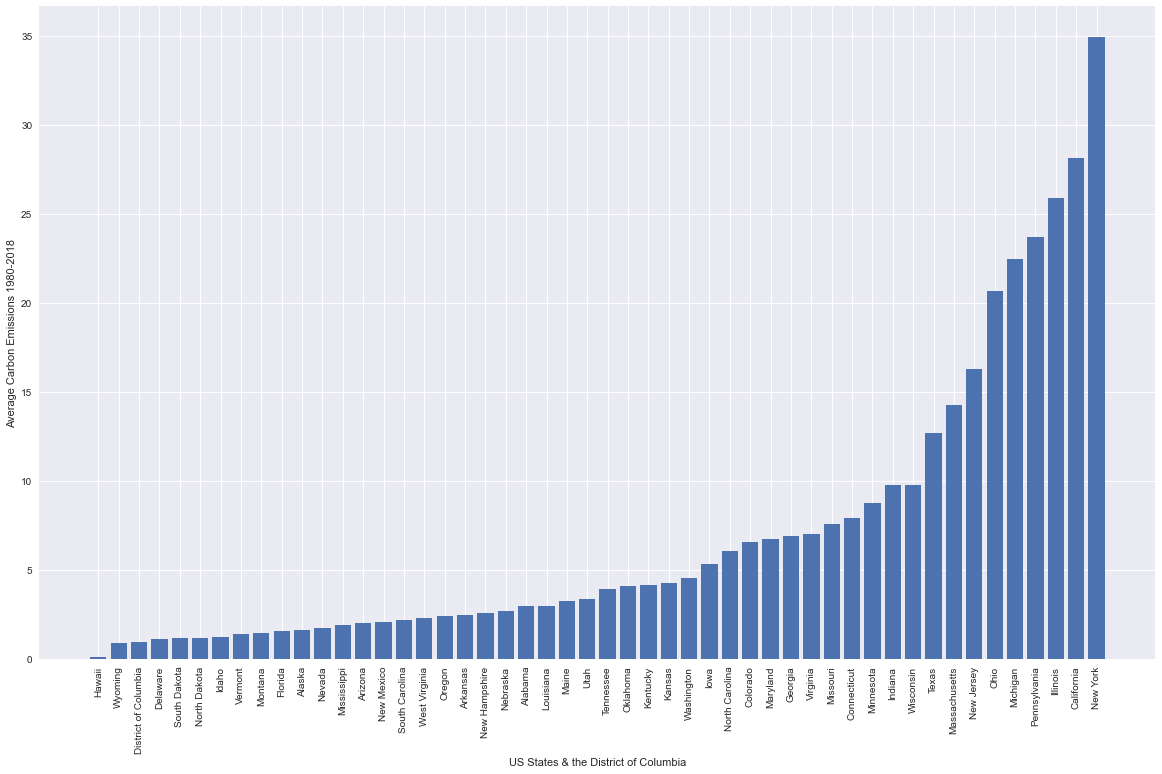

In [492]:
 sum_stat = df1.groupby(['state']).mean().sort_values('emissions')
plt.bar( sum_stat.index, sum_stat['emissions'])
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20, 12)
plt.ylabel('Average Carbon Emissions 1980-2018')
plt.xlabel('US States & the District of Columbia')

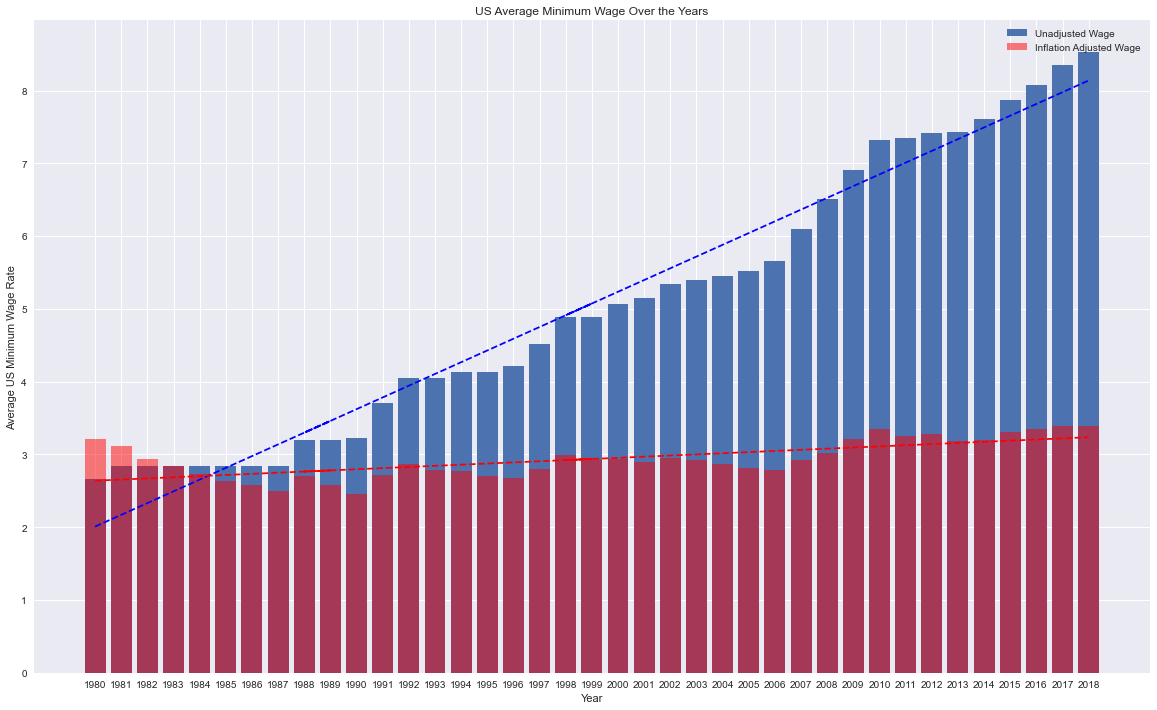

In [558]:
sum_stat = df1.groupby(['year']).mean().sort_values('min_wage')
plt.bar(sum_stat.index, sum_stat.min_wage, label="Unadjusted Wage")
plt.bar(sum_stat.index, sum_stat.adj_wage, label="Inflation Adjusted Wage", alpha = 0.5, color = 'red')
plt.xticks(range(1980,2019))
plt.legend(loc="upper right")

plt.xlabel("Year")
plt.ylabel("Average US Minimum Wage Rate")
plt.title("US Average Minimum Wage Over the Years")
x = sum_stat.index
y = sum_stat.min_wage
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")
x1 = sum_stat.index
y1 = sum_stat.adj_wage
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"r--")

Text(0.5, 1.0, 'US Federal Minimum Wage Over the Years')

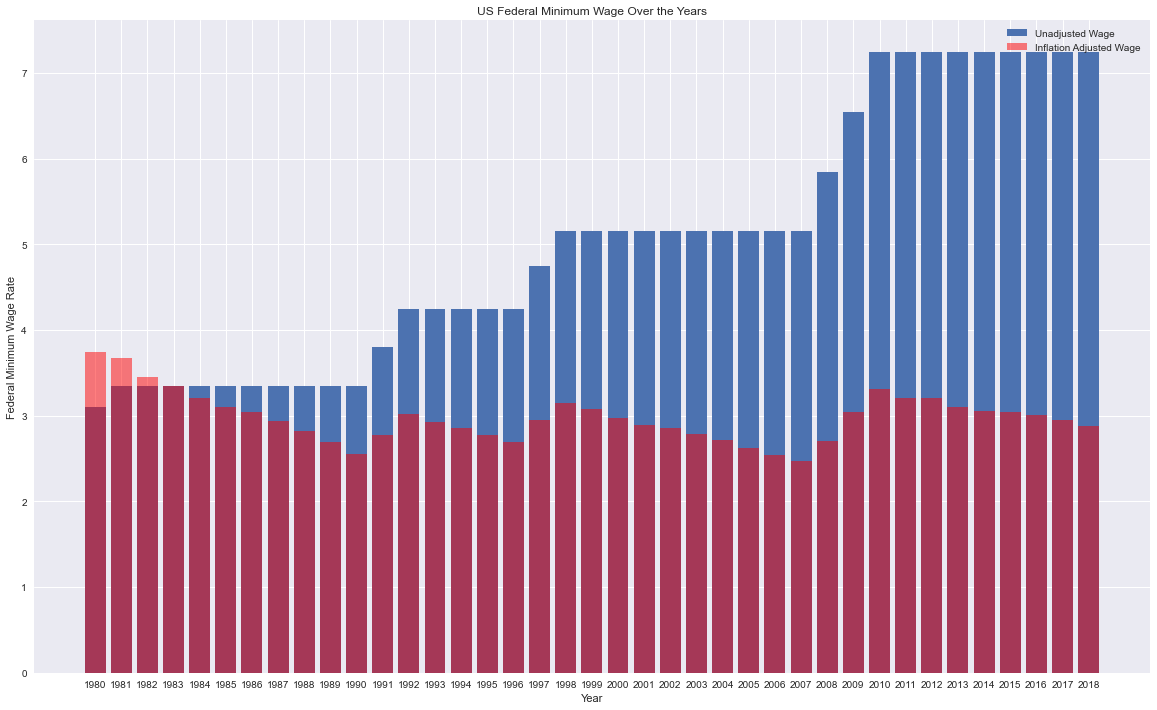

In [530]:
fed_df = df1[df1['state']=='Alabama'][['year','min_wage', 'adj_wage']]
plt.bar(fed_df.year, fed_df.min_wage, label="Unadjusted Wage")
plt.bar(fed_df.year, fed_df.adj_wage, label="Inflation Adjusted Wage", alpha = 0.5, color = 'red')
plt.xticks(range(1980,2019))
plt.legend(loc="upper right")

plt.xlabel("Year")
plt.ylabel("Federal Minimum Wage Rate")
plt.title("US Federal Minimum Wage Over the Years")

In [609]:
fed_df.describe()

,year,min_wage,adj_wage
count,39.000000,39.000000,39.000000
mean,1999.000000,5.014103,2.979338
std,11.401754,1.487268,0.283174
min,1980.000000,3.100000,2.474385
25%,1989.500000,3.350000,2.783286
50%,1999.000000,5.150000,2.947664
75%,2008.500000,6.200000,3.100322
max,2018.000000,7.250000,3.747087


Text(0.5, 1.0, 'Inequality in the US, over the years')

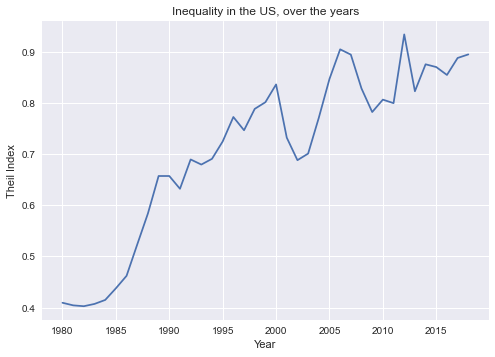

In [403]:
plt.plot(sum_stat.index, sum_stat.theil)
plt.xlabel("Year")
plt.ylabel("Theil Index")
plt.title("Inequality in the US, over the years")

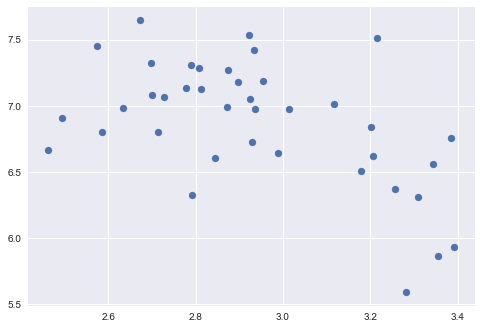

In [404]:
plt.scatter(sum_stat.adj_wage, sum_stat.emissions)

___

### Regression

In [610]:
df1

,year,state,emissions,min_wage,theil,region,CPI,adj_wage
0,1980,Alabama,3.6,3.10,0.397920,SO,82.400,3.747087
1,1981,Alabama,3.4,3.35,0.383564,SO,90.900,3.670627
2,1982,Alabama,3.4,3.35,0.361735,SO,96.500,3.457617
3,1983,Alabama,3.5,3.35,0.357333,SO,99.600,3.350000
4,1984,Alabama,3.3,3.35,0.367350,SO,103.900,3.211357
...,...,...,...,...,...,...,...,...
1984,2014,Wyoming,0.9,5.15,1.351635,WE,236.736,2.166717
1985,2015,Wyoming,0.8,5.15,1.261107,WE,237.017,2.164149
1986,2016,Wyoming,0.9,5.15,1.150676,WE,240.007,2.137188
1987,2017,Wyoming,0.9,5.15,1.375277,WE,245.120,2.092608


In [642]:
model1 = smf.ols(formula = 'emissions~theil',data=df1).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              emissions   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     107.3
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           1.59e-24
Time:                        23:28:44   Log-Likelihood:                -6910.2
No. Observations:                1989   AIC:                         1.382e+04
Df Residuals:                    1987   BIC:                         1.384e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1971      0.576      2.079      0.038       0.068       2.326
theil          8.0221      0.774     10.359      0.000       6.503       9.541
==============================================================================
Omnibus:                      615.641   Durbin-Watson:                   0.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1483.297
Skew:                           1.718   Prob(JB):                         0.00
Kurtosis:                       5.468   Cond. No.                         6.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [650]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
white_test = het_white(model1.resid,  model1.model.exog)
bp_test = het_breuschpagan(model1.resid, model1.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
#print(dict(zip(labels, white_test)))
print(dict(zip(labels, bp_test)))

{'LM Statistic': 84.00681100647944, 'LM-Test p-value': 4.930731304978504e-20, 'F-Statistic': 87.62316549701968, 'F-Test p-value': 2.0681965256391984e-20}


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

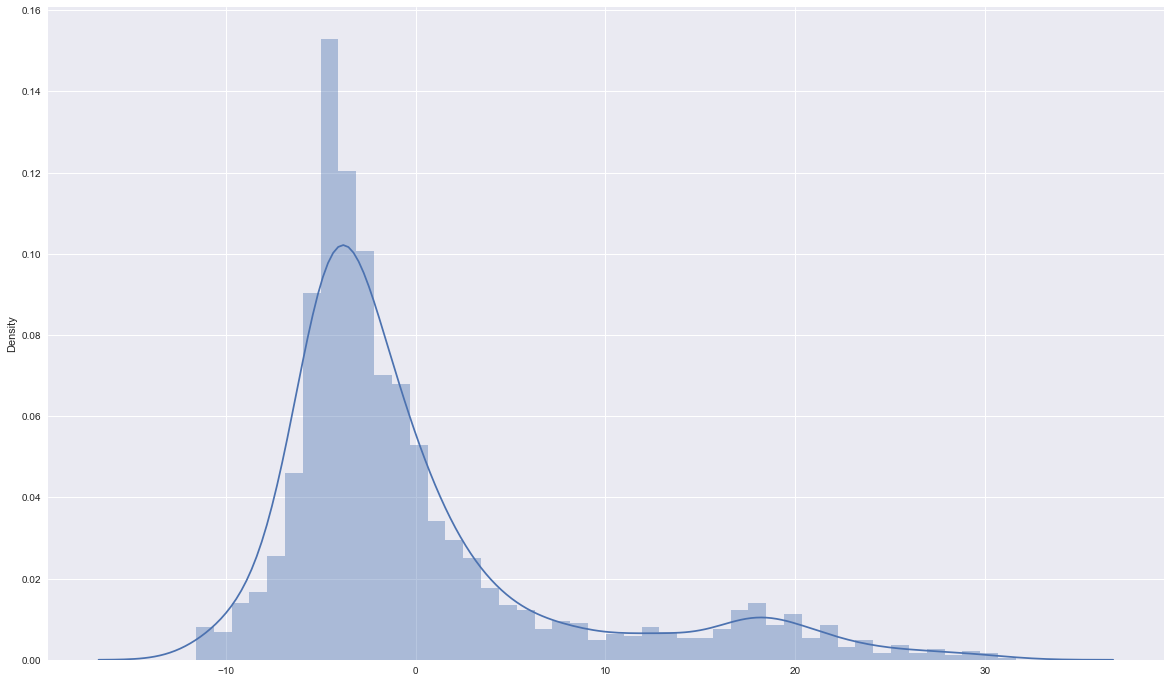

In [656]:
import seaborn as sns
sns.distplot(model.resid)

In [663]:
df_test = df1
df_test['con'] = 1
model_test = smf.ols(formula = 'emissions~theil+con',data=df_test, missing = 'drop').fit()
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              emissions   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     107.3
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           1.59e-24
Time:                        00:26:44   Log-Likelihood:                -6910.2
No. Observations:                1989   AIC:                         1.382e+04
Df Residuals:                    1987   BIC:                         1.384e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5985      0.288      2.079      0.038       0.034       1.163
theil          8.0221      0.774     10.359      0.000       6.503       9.541
con            0.5985      0.288      2.079      0.038       0.034       1.163
==============================================================================
Omnibus:                      615.641   Durbin-Watson:                   0.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1483.297
Skew:                           1.718   Prob(JB):                         0.00
Kurtosis:                       5.468   Cond. No.                     4.35e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.64e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [665]:
df_test['residual'] = model_test.resid
model_ss = smf.ols(formula = 'emissions~con+residual',data=df_test, missing = 'drop').fit()
model_ss.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              emissions   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 3.679e+04
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:35:55   Log-Likelihood:                -4007.6
No. Observations:                1989   AIC:                             8019.
Df Residuals:                    1987   BIC:                             8030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4397      0.020    168.980      0.000       3.400       3.480
con            3.4397      0.020    168.980      0.000       3.400       3.480
residual       1.0000      0.005    191.817      0.000       0.990       1.010
==============================================================================
Omnibus:                      158.040   Durbin-Watson:                   0.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.932
Skew:                           0.689   Prob(JB):                     3.16e-45
Kurtosis:                       3.758   Cond. No.                     2.14e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.65e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [666]:
model_final = smf.ols(formula = 'emissions~theil+adj_wage+region',data=df1, missing = 'drop').fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              emissions   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     108.9
Date:                Mon, 20 Dec 2021   Prob (F-statistic):          7.32e-102
Time:                        01:12:02   Log-Likelihood:                -6721.2
No. Observations:                1989   AIC:                         1.345e+04
Df Residuals:                    1983   BIC:                         1.349e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.8654      0.956      7.178      0.000       4.990       8.741
region[T.NE]     1.0234      0.525      1.950      0.051      -0.006       2.053
region[T.SO]    -6.1941      0.432    -14.350      0.000      -7.041      -5.348
region[T.WE]    -6.0683      0.460    -13.182      0.000      -6.971      -5.165
theil            8.1680      0.730     11.182      0.000       6.735       9.601
adj_wage        -0.7967      0.307     -2.596      0.009      -1.399      -0.195
==============================================================================
Omnibus:                      524.166   Durbin-Watson:                   0.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1218.162
Skew:                           1.458   Prob(JB):                    3.02e-265
Kurtosis:                       5.488   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [667]:
sm.stats.anova_lm(model1, model_final)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1987.0,121291.620185,0.0,NaN,NaN,NaN
1,1983.0,100292.204120,4.0,20999.416065,103.801293,2.373347e-80


In [640]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm
exog = df1.emissions
endog = df1.theil
pooledOLS_res = model
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

AttributeError: 'numpy.ndarray' object has no attribute 'fitted_values'

In [623]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = ‘blue’)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel(‘Predicted Values’, fontsize = 15)
ax.set_ylabel(‘Residuals’, fontsize = 15)
ax.set_title(‘Homoskedasticity Test’, fontsize = 30)
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              emissions   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     102.6
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           1.49e-23
Time:                        22:43:27   Log-Likelihood:                -6909.5
No. Observations:                1989   AIC:                         1.382e+04
Df Residuals:                    1987   BIC:                         1.383e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3173      0.578      2.279      0.023       0.184       2.451
theil          7.8604      0.776     10.131      0.000       6.339       9.382
==============================================================================
Omnibus:                      618.553   Durbin-Watson:                   0.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1496.102
Skew:                           1.725   Prob(JB):                         0.00
Kurtosis:                       5.481   Cond. No.                         6.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [622]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.049     
Dependent Variable: emissions        AIC:                13823.0120
Date:               2021-12-19 22:43 BIC:                13834.2028
No. Observations:   1989             Log-Likelihood:     -6909.5   
Df Model:           1                F-statistic:        102.6     
Df Residuals:       1987             Prob (F-statistic): 1.49e-23  
R-squared:          0.049            Scale:              60.998    
---------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
Intercept      1.3173     0.5780    2.2790   0.0228   0.1837   2.4510
theil          7.8604     0.7759   10.1311   0.0000   6.3388   9.3820
-------------------------------------------------------------------
Omnibus:             618.553       Durbin-Watson:          0.083   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       1496.102
Skew:                1.725         Prob(JB):               0.000   
Kurtosis:            5.481         Condition No.:          7       
===================================================================

"""

In [382]:
smf.ols(formula = 'emissions~theil+adj_wage+region',data=df1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              emissions   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     108.9
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          7.32e-102
Time:                        13:54:18   Log-Likelihood:                -6721.2
No. Observations:                1989   AIC:                         1.345e+04
Df Residuals:                    1983   BIC:                         1.349e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.8654      0.956      7.178      0.000       4.990       8.741
region[T.NE]     1.0234      0.525      1.950      0.051      -0.006       2.053
region[T.SO]    -6.1941      0.432    -14.350      0.000      -7.041      -5.348
region[T.WE]    -6.0683      0.460    -13.182      0.000      -6.971      -5.165
theil            8.1680      0.730     11.182      0.000       6.735       9.601
adj_wage        -0.7967      0.307     -2.596      0.009      -1.399      -0.195
==============================================================================
Omnibus:                      524.166   Durbin-Watson:                   0.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1218.162
Skew:                           1.458   Prob(JB):                    3.02e-265
Kurtosis:                       5.488   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""